Techniques:
1. Replace by most frequent value (Mode)
2. make a different column called "Missing"

Assumptions for Mode:
1. MCAR
2. Mode of columns must vary properly

Assumptions for Missing:
1. more than 10% data missing 
2. data is not randomly missing

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
dataframe = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
dataframe.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [39]:
dataframe.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'No of houses')

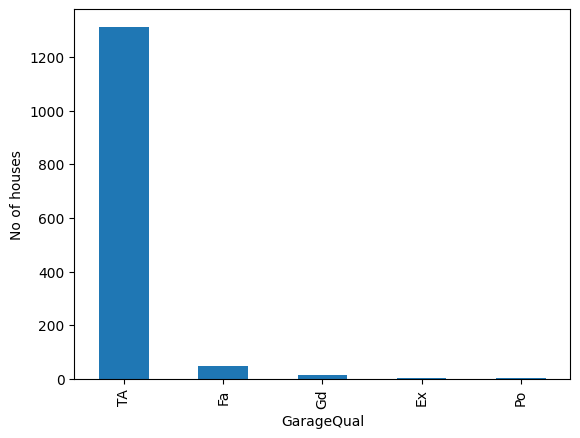

In [40]:
dataframe['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('No of houses')

In [41]:
dataframe.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [42]:
dataframe['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

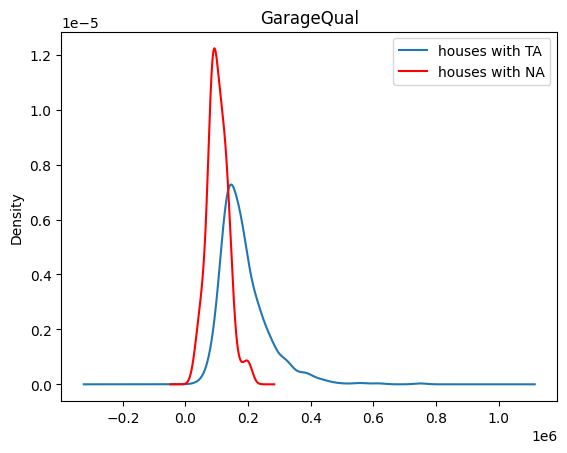

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataframe[dataframe['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
dataframe[dataframe['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['houses with TA','houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

C:\Users\rohit\AppData\Local\Temp\ipykernel_7240\2694407003.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['GarageQual'].fillna('TA',inplace=True)


<Axes: xlabel='GarageQual'>

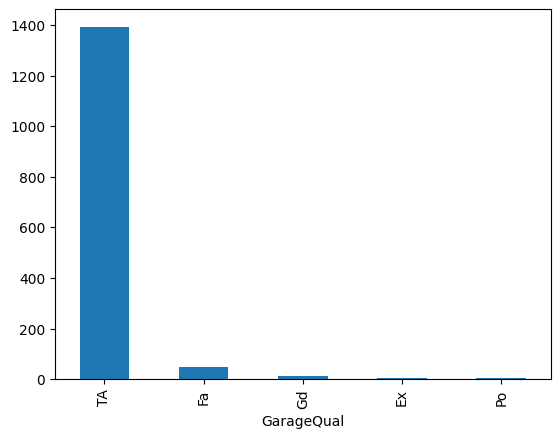

In [44]:
temp = dataframe[dataframe['GarageQual']=='TA']['SalePrice']
dataframe['GarageQual'].fillna('TA',inplace=True)
dataframe['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

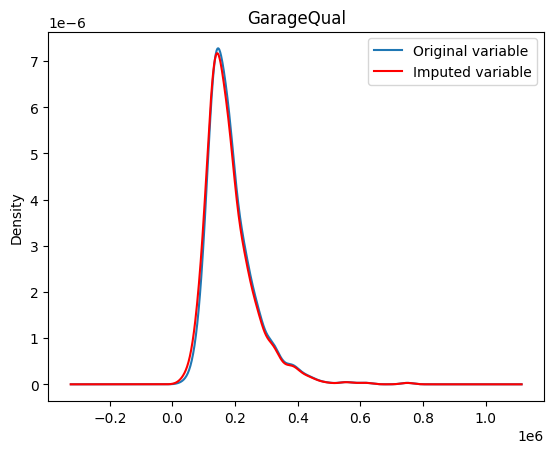

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)
dataframe[dataframe['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original variable','Imputed variable']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

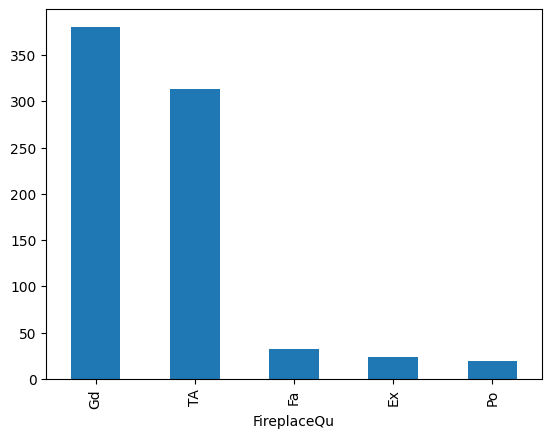

In [46]:
dataframe['FireplaceQu'].value_counts().plot.bar()

In [47]:
dataframe['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

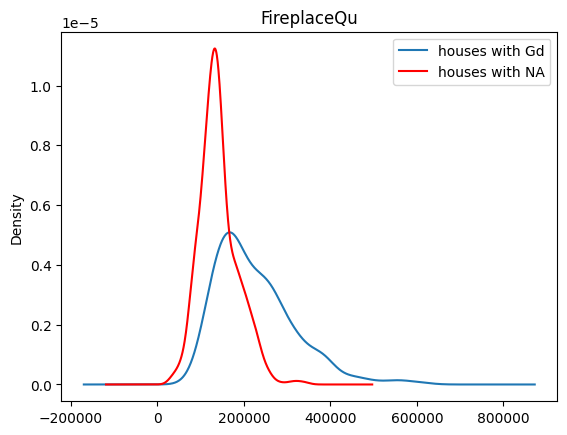

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataframe[dataframe['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
dataframe[dataframe['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['houses with Gd','houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

C:\Users\rohit\AppData\Local\Temp\ipykernel_7240\1468754506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['FireplaceQu'].fillna('Gd',inplace=True)


<Axes: xlabel='FireplaceQu'>

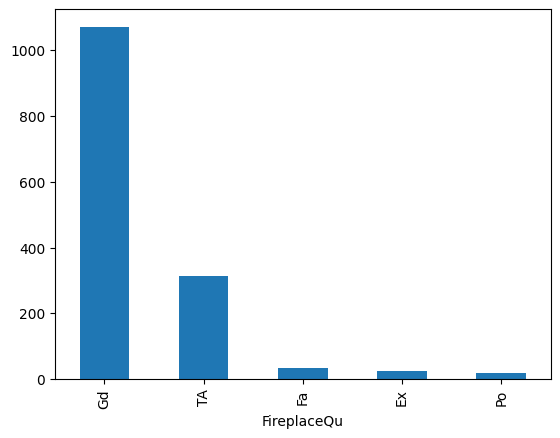

In [49]:
temp = dataframe[dataframe['FireplaceQu']=='Gd']['SalePrice']
dataframe['FireplaceQu'].fillna('Gd',inplace=True)
dataframe['FireplaceQu'].value_counts().plot.bar()

Text(0.5, 1.0, 'FireplaceQu')

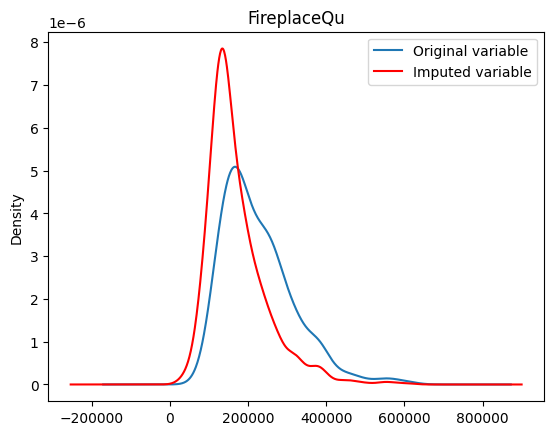

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)
dataframe[dataframe['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original variable','Imputed variable']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(dataframe.drop(columns=['SalePrice']),dataframe['SalePrice'],test_size=0.2)

In [52]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [53]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

imputer.statistics_

array(['Gd', 'TA'], dtype=object)

Missing Category Imputation

In [54]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


Text(0, 0.5, 'No of houses')

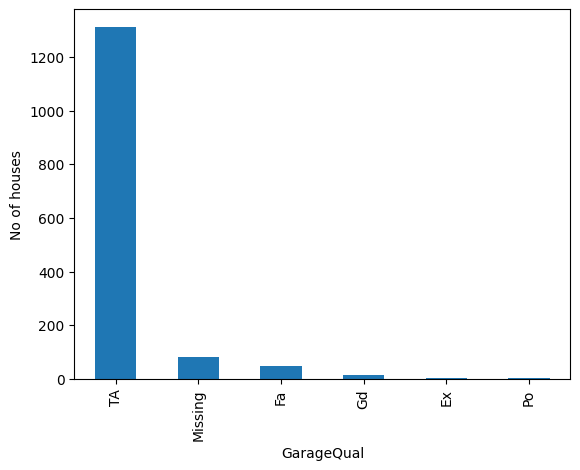

In [56]:
df['GarageQual'].fillna('Missing',inplace=True)
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('No of houses')

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [59]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [60]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

imputer.statistics_

array(['Missing', 'Missing'], dtype=object)